## Stock Market Prediction using Numerical and Textual Analysis

#### Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
import numpy as np
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pmdarima import auto_arima
import re
import nltk
import xgboost 
nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings("ignore")
print('Imported the libraries successfully.')

Imported the libraries successfully.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\v-hibajp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The datasets can be downloaded from below :
1. News Dataset : https://bit.ly/36fFPI6
2. Stock Dataset: https://finance.yahoo.com/

In [55]:
news_dataset = pd.read_csv('News.csv')
stock_dataset = pd.read_csv('Stock.csv')
print('Imported the datasets successfully.')

Imported the datasets successfully.


## 1. Analyze the stock dataset.

In [3]:
stock_dataset.shape

(251, 7)

In [4]:
stock_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-03,38480.890625,38754.238281,38142.300781,38623.699219,38623.699219,10600.0
1,2020-03-04,38715.718750,38791.699219,37846.101563,38409.480469,38409.480469,15300.0
2,2020-03-05,38604.250000,38887.800781,38386.679688,38470.609375,38470.609375,13500.0
3,2020-03-06,37613.960938,37747.070313,37011.089844,37576.621094,37576.621094,19000.0
4,2020-03-09,36950.199219,36950.199219,35109.179688,35634.949219,35634.949219,18800.0


In [56]:
stock_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,39460.322023,39759.285627,39040.329953,39409.401112,39409.401112,20857.831325
std,6570.283880,6495.135846,6636.416405,6585.713014,6585.713014,16108.779317
min,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,0.000000
25%,34335.378906,34769.480469,33958.019531,34247.050781,34247.050781,15100.000000
50%,38480.890625,38746.480469,38275.449219,38470.609375,38470.609375,18400.000000
75%,44729.519531,44825.371094,44247.121094,44632.648438,44632.648438,22300.000000
max,52400.031250,52516.761719,51886.460938,52154.128906,52154.128906,188300.000000


In [57]:
# Drop the rows where the data is not available
stock_dataset.dropna(inplace=True)

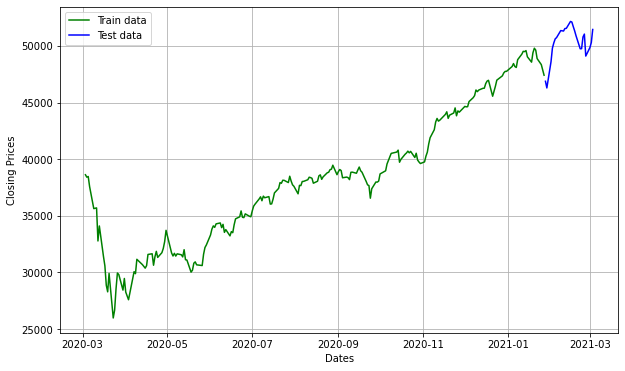

In [118]:
#split data into train and training set
train_data, test_data = stock_dataset[:int(len(stock_dataset)*0.9)], stock_dataset[int(len(stock_dataset)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data['Date'],train_data['Close'], 'green', label='Train data')
plt.plot(test_data['Date'],test_data['Close'], 'blue', label='Test data')
plt.legend()

In [59]:
model_autoARIMA = auto_arima(train_data['Close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5369.103, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3577.343, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3578.576, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3576.433, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3577.053, Time=0.24 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3581.177, Time=0.21 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3577.508, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3574.281, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4060.077, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3574.527, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3570.422, T

In [60]:
model = ARIMA(train_data['Close'], order=(0,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  223
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1773.135
Method:                       css-mle   S.D. of innovations            686.992
Date:                Tue, 09 Mar 2021   AIC                           3552.270
Time:                        13:36:52   BIC                           3562.492
Sample:                             1   HQIC                          3556.397
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            39.8699     42.023      0.949      0.343     -42.495     122.234
ma.L1.D.Close    -0.0870      0.060     -1.453      0.146      -0.204       0.030
                                    Root

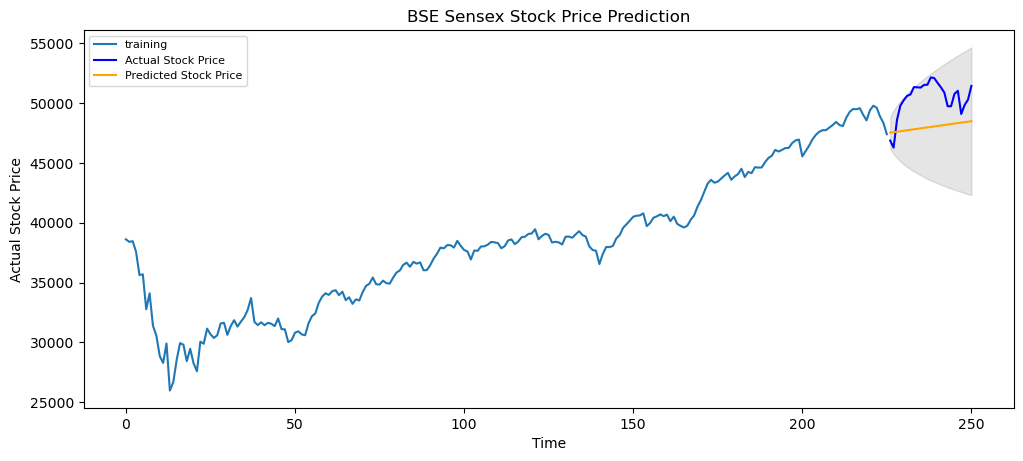

In [120]:
fc, se, conf = fitted.forecast(25, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data['Close'], label='training')
plt.plot(test_data['Close'], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('BSE Sensex Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [62]:
# report performance
mse = mean_squared_error(test_data['Close'], fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Close'], fc)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(test_data['Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data['Close'])/np.abs(test_data['Close']))
print('MAPE: '+str(mape))

MSE: 7585198.0161292665
MAE: 2554.9495371015046
RMSE: 2754.123820043185
MAPE: 0.050198663429114845


## 2. Analyze the News Dataset

In [69]:
news_dataset.head()

,publish_date,headline_category,headline_text,IsBusinessNews
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,0
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,0
2,20010102,unknown,Fissures in Hurriyat over Pak visit,0
3,20010102,unknown,America's unwanted heading for India?,0
4,20010102,unknown,For bigwigs; it is destination Goa,0


In [70]:
# Convert the date format so that it can be used easily later.
news_dataset['publish_date'] = pd.to_datetime(news_dataset['publish_date'],format='%Y%m%d')

In [71]:
# Add function to identity the business related news from the entire news dataset.
isBusinessNews = []
def identify_business_news(category):
    if 'business' in category.lower():
        isBusinessNews.append(1)
    else:
        isBusinessNews.append(0)        

In [72]:
for category in news_dataset.headline_category:
    identify_business_news(category)

In [73]:
# Add the IsBusinessNews Column to the datset
news_dataset['IsBusinessNews'] = pd.DataFrame(isBusinessNews)

In [74]:
# Filter the business news which will be considered under this study.
business_news_dataset = news_dataset[news_dataset['IsBusinessNews'] == 1]

In [75]:
business_news_dataset.head()

,publish_date,headline_category,headline_text,IsBusinessNews
276,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,1
4500,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,1
4567,2001-05-22,business.india-business,Samsung says hello to cellular unit in India,1
4574,2001-05-22,business.india-business,Govt lifts port-linked curbs on imports,1
4587,2001-05-22,business.india-business,RIL plans to mop up to Rs 1;000cr,1


#### Preprocess the text data so that the model trains on only appropriate data

In [76]:
import string
PUNCT_TO_REMOVE = string.punctuation
PUNCT_TO_REMOVE

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [77]:
# Remove the puncturations
business_news_dataset.headline_text = business_news_dataset.headline_text.apply(lambda text :  text.translate(str.maketrans('', '', PUNCT_TO_REMOVE)))

In [78]:
# Normalize the text data to lower format
business_news_dataset.headline_text = business_news_dataset.headline_text.apply(lambda text :  text.lower())

In [79]:
# Tokenize the text data
business_news_dataset.headline_text = business_news_dataset.headline_text.apply(lambda text :  text.split())

In [80]:
# Reduce the words to basic forms using Porter Stemmer.
ps = PorterStemmer()
business_news_dataset.headline_text = business_news_dataset.headline_text.apply(lambda text :  [ps.stem(word) for word in text if not word in set(stopwords.words('english'))])

In [81]:
business_news_dataset.head()

,publish_date,headline_category,headline_text,IsBusinessNews
276,2001-01-04,business.india-business,"[car, dealer, caught, bihar, sale, tax, rule]",1
4500,2001-05-22,business.india-business,"[renegoti, best, deshmukh, lender, so, centr]",1
4567,2001-05-22,business.india-business,"[samsung, say, hello, cellular, unit, india]",1
4574,2001-05-22,business.india-business,"[govt, lift, portlink, curb, import]",1
4587,2001-05-22,business.india-business,"[ril, plan, mop, rs, 1000cr]",1


In [82]:
# Join the stemmed tokens to get the normalized sentence.
business_news_dataset.headline_text = business_news_dataset.headline_text.apply(lambda text :  ' '.join(text))

In [83]:
business_news_dataset.head()

,publish_date,headline_category,headline_text,IsBusinessNews
276,2001-01-04,business.india-business,car dealer caught bihar sale tax rule,1
4500,2001-05-22,business.india-business,renegoti best deshmukh lender so centr,1
4567,2001-05-22,business.india-business,samsung say hello cellular unit india,1
4574,2001-05-22,business.india-business,govt lift portlink curb import,1
4587,2001-05-22,business.india-business,ril plan mop rs 1000cr,1


In [84]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [85]:
# Add Subjectivety column for the text.
business_news_dataset['Subjectivety'] = business_news_dataset.headline_text.apply(lambda text : getSubjectivity(text))

In [86]:
# Add Polarity column for the text.
business_news_dataset['Polarity'] = business_news_dataset.headline_text.apply(lambda text : getPolarity(text))

In [87]:
business_news_dataset.head(5)

,publish_date,headline_category,headline_text,IsBusinessNews,Subjectivety,Polarity
276,2001-01-04,business.india-business,car dealer caught bihar sale tax rule,1,0.0,0.0
4500,2001-05-22,business.india-business,renegoti best deshmukh lender so centr,1,0.3,1.0
4567,2001-05-22,business.india-business,samsung say hello cellular unit india,1,0.0,0.0
4574,2001-05-22,business.india-business,govt lift portlink curb import,1,0.0,0.0
4587,2001-05-22,business.india-business,ril plan mop rs 1000cr,1,0.0,0.0


In [88]:
# Get the other scores for the text, which can be helpful in preparing a model.
sia = SentimentIntensityAnalyzer()

business_news_dataset['Compound'] = [sia.polarity_scores(v)['compound'] for v in business_news_dataset['headline_text']]
business_news_dataset['Negative'] = [sia.polarity_scores(v)['neg'] for v in business_news_dataset['headline_text']]
business_news_dataset['Neutral'] = [sia.polarity_scores(v)['neu'] for v in business_news_dataset['headline_text']]
business_news_dataset['Positive'] = [sia.polarity_scores(v)['pos'] for v in business_news_dataset['headline_text']]

## Merge the news and stock dataset and prepare a machine learning model.

In [89]:
business_news_dataset.head()

,publish_date,headline_category,headline_text,IsBusinessNews,Subjectivety,Polarity,Compound,Negative,Neutral,Positive
276,2001-01-04,business.india-business,car dealer caught bihar sale tax rule,1,0.0,0.0,0.0000,0.0,1.000,0.000
4500,2001-05-22,business.india-business,renegoti best deshmukh lender so centr,1,0.3,1.0,0.6369,0.0,0.543,0.457
4567,2001-05-22,business.india-business,samsung say hello cellular unit india,1,0.0,0.0,0.0000,0.0,1.000,0.000
4574,2001-05-22,business.india-business,govt lift portlink curb import,1,0.0,0.0,0.0000,0.0,1.000,0.000
4587,2001-05-22,business.india-business,ril plan mop rs 1000cr,1,0.0,0.0,0.0000,0.0,1.000,0.000


In [90]:
stock_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-03,38480.890625,38754.238281,38142.300781,38623.699219,38623.699219,10600.0
1,2020-03-04,38715.718750,38791.699219,37846.101563,38409.480469,38409.480469,15300.0
2,2020-03-05,38604.250000,38887.800781,38386.679688,38470.609375,38470.609375,13500.0
3,2020-03-06,37613.960938,37747.070313,37011.089844,37576.621094,37576.621094,19000.0
4,2020-03-09,36950.199219,36950.199219,35109.179688,35634.949219,35634.949219,18800.0


In [91]:
# Since date column name is different in both the dataset, let's add Date column in the business_news dataset with the same
# values as publish_date column
business_news_dataset['Date'] = business_news_dataset.publish_date

In [92]:
business_news_dataset.head()

,publish_date,headline_category,headline_text,IsBusinessNews,Subjectivety,Polarity,Compound,Negative,Neutral,Positive,Date
276,2001-01-04,business.india-business,car dealer caught bihar sale tax rule,1,0.0,0.0,0.0000,0.0,1.000,0.000,2001-01-04
4500,2001-05-22,business.india-business,renegoti best deshmukh lender so centr,1,0.3,1.0,0.6369,0.0,0.543,0.457,2001-05-22
4567,2001-05-22,business.india-business,samsung say hello cellular unit india,1,0.0,0.0,0.0000,0.0,1.000,0.000,2001-05-22
4574,2001-05-22,business.india-business,govt lift portlink curb import,1,0.0,0.0,0.0000,0.0,1.000,0.000,2001-05-22
4587,2001-05-22,business.india-business,ril plan mop rs 1000cr,1,0.0,0.0,0.0000,0.0,1.000,0.000,2001-05-22


In [93]:
business_news_dataset.dtypes

publish_date         datetime64[ns]
headline_category            object
headline_text                object
IsBusinessNews                int64
Subjectivety                float64
Polarity                    float64
Compound                    float64
Negative                    float64
Neutral                     float64
Positive                    float64
Date                 datetime64[ns]
dtype: object

In [94]:
stock_dataset.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

We can clearly see the datatype for Date in both the columns are different let's change the datatype so that the datasets are easier to join.

In [95]:
stock_dataset.Date = stock_dataset.Date.astype('datetime64[ns]')

In [96]:
merged_dataset = pd.merge(business_news_dataset, stock_dataset, how='inner', on='Date')

In [97]:
merged_dataset.head()

,publish_date,headline_category,headline_text,IsBusinessNews,Subjectivety,Polarity,Compound,Negative,Neutral,Positive,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-03,business.india-business,soft raw materi price spell hope corona may pl...,1,0.405769,-0.065385,0.6486,0.0,0.629,0.371,2020-03-03,38480.890625,38754.238281,38142.300781,38623.699219,38623.699219,10600.0
1,2020-03-03,business.india-business,urea co benefit corona impact ga price regist ...,1,0.000000,0.000000,0.4588,0.0,0.727,0.273,2020-03-03,38480.890625,38754.238281,38142.300781,38623.699219,38623.699219,10600.0
2,2020-03-03,business.india-business,northern arc capit credabl close trade receiv ...,1,0.000000,0.000000,0.0000,0.0,1.000,0.000,2020-03-03,38480.890625,38754.238281,38142.300781,38623.699219,38623.699219,10600.0
3,2020-03-03,business.india-business,pevc invest 18bn feb 2020,1,0.000000,0.000000,0.0000,0.0,1.000,0.000,2020-03-03,38480.890625,38754.238281,38142.300781,38623.699219,38623.699219,10600.0
4,2020-03-03,business.india-business,cocacola chief want doubl india biz 5 yr,1,0.000000,0.000000,0.0772,0.0,0.822,0.178,2020-03-03,38480.890625,38754.238281,38142.300781,38623.699219,38623.699219,10600.0


From the merged dataset, the columns of our interest are : 'Subjectivety','Polarity','Compound','Negative','Positive','Neutral','Close'

In [98]:
dataset_for_modelling = merged_dataset[['Subjectivety','Polarity','Compound','Negative','Positive','Neutral','Close']]

In [99]:
dataset_for_modelling.head()

,Subjectivety,Polarity,Compound,Negative,Positive,Neutral,Close
0,0.405769,-0.065385,0.6486,0.0,0.371,0.629,38623.699219
1,0.000000,0.000000,0.4588,0.0,0.273,0.727,38623.699219
2,0.000000,0.000000,0.0000,0.0,0.000,1.000,38623.699219
3,0.000000,0.000000,0.0000,0.0,0.000,1.000,38623.699219
4,0.000000,0.000000,0.0772,0.0,0.178,0.822,38623.699219


#### Normalize the values 

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_dataset = pd.DataFrame(scaler.fit_transform(dataset_for_modelling))
scaled_dataset.columns = dataset_for_modelling.columns

In [104]:
scaled_dataset.head()

,Subjectivety,Polarity,Compound,Negative,Positive,Neutral,Close
0,0.405769,0.519231,0.893913,0.0,0.457460,0.542540,1.0
1,0.000000,0.555556,0.783884,0.0,0.336621,0.663379,1.0
2,0.000000,0.555556,0.517913,0.0,0.000000,1.000000,1.0
3,0.000000,0.555556,0.517913,0.0,0.000000,1.000000,1.0
4,0.000000,0.555556,0.562667,0.0,0.219482,0.780518,1.0


#### Seperate out the feature columns and the target column. The column to predict is 'Close'

In [105]:
features_for_modelling = scaled_dataset[['Subjectivety','Polarity','Compound','Negative','Positive','Neutral']]

In [106]:
predited_column = scaled_dataset.Close

In [107]:
# Split the dataset into train and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_for_modelling, predited_column, test_size = 0.2)

#### Decision Tree Regressor

In [108]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
predictions = dtree.predict(x_test)

In [114]:
mean_squared_error(y_test, predictions)*100

5.572482116569203

#### RandomForestRegressor

In [110]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor()

In [111]:
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor()

In [113]:
pred = random_forest_regressor.predict(x_test)
mean_squared_error(y_test, pred)*100

4.52964818297803

#### XG Boost Regressor

In [121]:
xgboost_regressor = xgboost.XGBRegressor()

In [122]:
xgboost_regressor.fit(x_train,y_train)
predictions = xgboost_regressor.predict(x_test)

In [123]:
mean_squared_error(y_test, predictions)*100

4.9823154655351525

## Conclusion

For this study, 
1. RandomForestRegressor, performs better that DecisionTreeRegressor and XG Boost Regressor. 
2. Preprocessing of text data not only saves time but also can help improve the performance of the model.

##  Future Improvements

1. Use Deep Learning Algorithm and analyze their performance.
2. Use different text analytics techniques like Word2vec, glove etc.

## Acknowledgements:
1. https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd